In [3]:
#Importação de bibliotecas
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [17]:
#Importação da base de dados do Fifa 19
data = pd.read_csv("C:\\Users\Fiatkoski\Desktop\Analytics\Big Data Real-Time Analytics com Python e Spark\data.csv",
                   sep = ",", encoding = "utf-8")
data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
#Deletando colunas que não iremos utilizar
data.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)
data.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
#Verificando o tipo dos dados
data.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                          

In [21]:
#Quantidade total de paises com jogadores registrados
#A função nunique retorna a quantia de objetos únicos de uma variável
data.Nationality.nunique()

164

In [54]:
#Verificar os 10 países que possuem a maior quantia de jogadores registrados
pd.DataFrame(data['Nationality'].value_counts().head(10))

,Nationality
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478
Netherlands,453


In [44]:
#Média de idade
data.Age.mean()

25.122205745043114

In [49]:
#Verificar as 10 idades com o maior número de jogadores
data['Age'].value_counts().head(10)

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
Name: Age, dtype: int64

In [89]:
#Media de jogadores por país
data.groupby('Nationality').Age.mean().sort_values(ascending = False).head(10)

Nationality
Oman                   36.00
Puerto Rico            34.00
Ethiopia               32.00
Trinidad & Tobago      31.75
Palestine              31.00
Kuwait                 31.00
São Tomé & Príncipe    31.00
Fiji                   30.00
Guam                   30.00
New Caledonia          30.00
Name: Age, dtype: float64

In [90]:
#10 times com a menor média de idade
data.groupby('Club').Age.mean().sort_values(ascending = True).head(10)

Club
FC Nordsjælland             20.259259
FC Groningen                21.423077
Bohemian FC                 21.480000
FC Sochaux-Montbéliard      21.678571
FC Admira Wacker Mödling    21.925926
LOSC Lille                  22.000000
Envigado FC                 22.035714
Stabæk Fotball              22.074074
Barnsley                    22.107143
Derry City                  22.111111
Name: Age, dtype: float64

In [91]:
#10 times com a maior média de idade
#Curioso que todos são do Brasil;
data.groupby('Club').Age.mean().sort_values(ascending = False).head(10)

Club
Paraná                  31.6
Cruzeiro                30.6
Atlético Paranaense     30.4
Chapecoense             30.4
Botafogo                30.4
Fluminense              30.2
Ceará Sporting Club     30.2
Sport Club do Recife    30.2
Bahia                   30.0
Grêmio                  30.0
Name: Age, dtype: float64

In [93]:
#Média de idade do Brasil
data.groupby('Nationality').Age.mean()['Brazil']

27.62515114873035

In [108]:
#Overal por idade
#Agg faz o agrupamento pelas variáveis passadas como parâmetro
data.groupby('Age').Overall.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = False).head(10)

,min,max,mean
Age,,,
45,71,71,71.000000
31,50,94,69.850071
30,52,89,69.695747
33,48,94,69.558824
34,54,86,69.539604
32,52,91,69.529617
29,53,90,69.246090
28,51,90,69.213442
27,50,91,68.949225


In [109]:
#Potencial por idade
#Agg faz o agrupamento pelas variáveis passadas como parâmetro
data.groupby('Age').Potential.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = False).head(10)

,min,max,mean
Age,,,
17,57,92,74.339100
18,55,91,73.530055
20,57,90,73.213710
16,66,86,73.190476
19,57,95,73.146484
21,56,92,72.957836
22,56,92,72.819403
23,57,92,72.555556
24,53,94,72.079529


In [111]:
#Quais clubes possuem a maior média de overall?
data.groupby('Club').Overall.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = False).head(10)

,min,max,mean
Club,,,
Juventus,62,94,82.280000
Napoli,70,88,80.000000
Inter,64,88,79.750000
Real Madrid,62,91,78.242424
Milan,66,88,78.074074
FC Barcelona,61,94,78.030303
Paris Saint-Germain,62,92,77.433333
Roma,64,85,77.423077
Manchester United,63,91,77.242424


In [113]:
#Quais clubes possuem a pior média de overall?
data.groupby('Club').Overall.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = True).head(10)

,min,max,mean
Club,,,
Bray Wanderers,48,58,53.652174
Limerick FC,49,62,54.526316
Bohemian FC,49,64,55.000000
Derry City,48,62,55.777778
Sligo Rovers,49,63,56.631579
Crewe Alexandra,47,64,56.785714
Cambridge United,47,65,56.928571
Morecambe,48,65,57.000000
Waterford FC,47,67,57.200000


In [114]:
#Quais países possuem a maior média de overall?
data.groupby('Nationality').Overall.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = False).head(10)

,min,max,mean
Nationality,,,
United Arab Emirates,77,77,77.000000
Central African Rep.,68,82,73.333333
Israel,65,80,72.142857
Dominican Republic,64,80,72.000000
São Tomé & Príncipe,72,72,72.000000
Oman,72,72,72.000000
Cape Verde,65,79,71.631579
Portugal,57,94,71.344720
Togo,63,79,71.333333


In [115]:
#Quais países possuem a maior média de overall?
data.groupby('Nationality').Overall.agg(['min', 'max', 'mean']).sort_values(by = 'mean', ascending = True).head(10)

,min,max,mean
Nationality,,,
Botswana,56,56,56.000000
Indonesia,56,56,56.000000
India,53,67,58.666667
China PR,47,76,59.910714
South Sudan,60,60,60.000000
Belize,60,60,60.000000
Hong Kong,59,62,60.500000
Saudi Arabia,50,74,60.767647
Republic of Ireland,47,80,60.885870


In [118]:
#Jogadores com a melhor qualidade de drible
data.sort_values(by = 'Dribbling', ascending = False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
30,197781,Isco,26,Spain,88,91,Real Madrid,€73.5M,€315K,2137,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
94,184267,Y. Brahimi,28,Algeria,85,85,FC Porto,€39M,€28K,2030,...,90.0,51.0,36.0,25.0,13.0,16.0,12.0,7.0,7.0,€78M
15,211110,P. Dybala,24,Argentina,89,94,Juventus,€89M,€205K,2092,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
56,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,€59.5M,€180K,2039,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,€46.5M,€175K,2111,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
84,204485,R. Mahrez,27,Algeria,85,85,Manchester City,€40.5M,€205K,2031,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,€74.9M
50,175943,D. Mertens,31,Belgium,87,87,Napoli,€45M,€135K,2043,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,€76.5M


In [123]:
#Jogadores com a maior força no chute
data.sort_values(by = 'ShotPower', ascending = False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
378,189362,Hulk,31,Brazil,81,81,Shanghai SIPG FC,€15.5M,€25K,2102,...,75.0,50.0,41.0,28.0,6.0,10.0,7.0,11.0,12.0,€34.1M
1348,169051,F. Guarín,32,Colombia,76,76,Shanghai Greenland Shenhua FC,€6M,€16K,2102,...,76.0,60.0,66.0,60.0,12.0,13.0,13.0,15.0,13.0,€12.9M
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,€6.5M,€11K,2048,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,€8.1M
36,173731,G. Bale,28,Wales,88,88,Real Madrid,€60M,€355K,2279,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,€9M,€38K,1959,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
291,185103,A. Kolarov,32,Serbia,82,82,Roma,€12.5M,€73K,2230,...,88.0,81.0,82.0,81.0,16.0,15.0,8.0,16.0,6.0,€21.3M
45,195864,P. Pogba,25,France,87,91,Manchester United,€64M,€210K,2247,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
3921,214771,V. Ayala,30,Paraguay,72,72,Gimnasia y Esgrima La Plata,€2.9M,€11K,2038,...,66.0,69.0,68.0,63.0,8.0,13.0,9.0,9.0,9.0,€4.3M


In [124]:
#Jogadores que melhor batem penaltis
data.sort_values(by = 'Penalties', ascending = False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
206,186627,M. Balotelli,27,Italy,83,83,OGC Nice,€27.5M,€55K,1914,...,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,€52.3M
118,209499,Fabinho,24,Brazil,84,88,Liverpool,€34M,€120K,2164,...,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,€67.2M
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,€83.5M,€205K,2165,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
297,183574,M. Kruse,30,Germany,82,82,SV Werder Bremen,€21.5M,€45K,2063,...,86.0,57.0,38.0,34.0,12.0,7.0,5.0,13.0,9.0,€36.6M
945,163631,L. Baines,33,England,77,77,Everton,€3.4M,€74K,2126,...,84.0,76.0,78.0,77.0,8.0,15.0,10.0,13.0,12.0,€6.5M
507,188388,R. Boudebouz,28,Algeria,80,80,Real Betis,€15M,€31K,2004,...,79.0,55.0,35.0,30.0,10.0,12.0,16.0,10.0,14.0,€31.5M
384,183900,D. Perotti,29,Argentina,81,81,Roma,€17.5M,€84K,1959,...,81.0,58.0,31.0,22.0,5.0,8.0,14.0,6.0,8.0,€29.8M
823,204838,R. Jiménez,27,Mexico,78,79,Wolverhampton Wanderers,€12M,€15K,1957,...,74.0,46.0,36.0,28.0,7.0,11.0,13.0,14.0,10.0,NaN
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,€14M,€15K,2012,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,€21M
68,188350,M. Reus,29,Germany,86,86,Borussia Dortmund,€43.5M,€100K,2172,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,€74M


In [125]:
#Jogadores mais agressivos
data.sort_values(by = 'Aggression', ascending = False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1948,213689,B. Pearson,23,England,75,81,Preston North End,€8M,€12K,1875,...,72.0,73.0,75.0,74.0,8.0,15.0,9.0,16.0,11.0,€16.8M
9512,213922,D. Erdmann,27,Germany,66,66,1. FC Magdeburg,€550K,€4K,1600,...,58.0,64.0,73.0,77.0,12.0,10.0,8.0,9.0,9.0,€853K
940,230183,Gazzolisco,30,Brazil,77,77,Internacional,€6.5M,€26K,2123,...,77.0,74.0,77.0,75.0,9.0,16.0,8.0,8.0,10.0,€12.4M
16919,138427,D. Pipe,34,Wales,56,56,Newport County,€30K,€1K,1484,...,53.0,56.0,51.0,58.0,12.0,16.0,14.0,15.0,7.0,€53K
4037,169498,J. Garner,30,England,71,71,Wigan Athletic,€2.3M,€35K,1872,...,68.0,46.0,49.0,38.0,10.0,15.0,15.0,12.0,15.0,€4.3M
700,176944,M. Fellaini,30,Belgium,79,79,Manchester United,€11.5M,€120K,1994,...,78.0,77.0,77.0,60.0,8.0,6.0,9.0,15.0,16.0,€21.3M
108,120533,Pepe,35,Portugal,85,85,Beşiktaş JK,€9M,€57K,1832,...,79.0,86.0,85.0,82.0,8.0,15.0,5.0,9.0,10.0,€17.1M
2559,216811,K. Waston,30,Costa Rica,74,74,Vancouver Whitecaps FC,€4.2M,€7K,1485,...,55.0,78.0,65.0,63.0,13.0,14.0,14.0,6.0,7.0,€6.3M
556,239818,Rúben Dias,21,Portugal,79,85,SL Benfica,€15M,€10K,1641,...,72.0,79.0,80.0,75.0,7.0,8.0,13.0,7.0,12.0,€33M
100,179844,Diego Costa,29,Spain,85,85,Atlético Madrid,€38.5M,€100K,2003,...,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,€78.9M


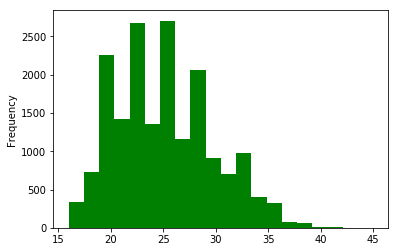

In [177]:
#Distribuição de idade
data.Age.plot(kind = 'hist', bins = 20, color = 'green')

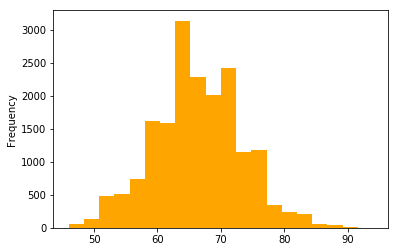

In [183]:
#Distribuição de overall
data.Overall.plot(kind = 'hist', bins = 20, color = 'orange')

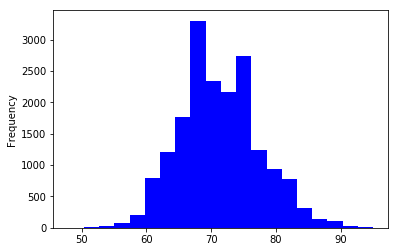

In [182]:
#Distribuição de potencial
data.Potential.plot(kind = 'hist', bins = 20, color = 'blue')

Text(0.5,1,'Clubes com os melhores jogadores')

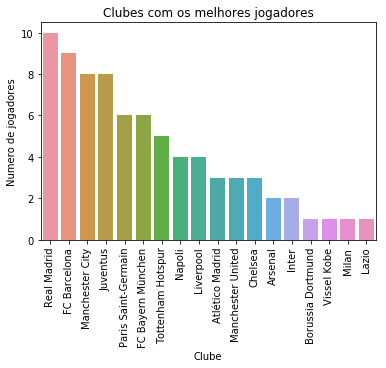

In [184]:
#Verificando os clubes com os melhores jogadores, considerando apenas jogadores com Overall acima de 85
#Alguns jogadores com Overall muito elevado podem enviezar nossa média
#Na outra análise a Juventus aparecia como o melhor clube, com essas regras o Real Madrid assumiu a dianteira

best = data[data['Overall']> 85]
grouped = best.groupby('Club')
count_by_club = grouped.count()['Name'].sort_values(ascending = False)
 
ax = sns.countplot(x = 'Club', data = best, order = count_by_club.index)
ax.set_xticklabels(labels = count_by_club.index, rotation='vertical')
ax.set_ylabel('Numero de jogadores')
ax.set_xlabel('Clube')
ax.set_title('Clubes com os melhores jogadores')

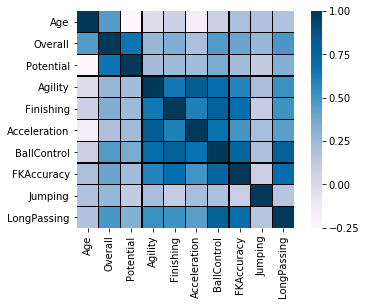

In [194]:
#criando um novo dataset com os atributos que se deseja avaliar a correlação
analise = data.loc[:,['Age','Overall', 'Potential', 'Agility', 'Finishing', 'Acceleration','BallControl','FKAccuracy','Jumping', 'LongPassing' ]]

#fazendo a matriz de correlação
corr = analise.corr()

#plotando a matriz de correlação
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
linewidths=0.25, vmax=1.0, square=True, cmap = 'PuBu', linecolor='black', annot=False)